###  Crabs Dataset

<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/crab.jpg" width="750" align="center">

In [1]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/crabs.csv

--2025-05-22 07:24:27--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/crabs.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.150.54, 3.5.244.53, 52.95.142.6, ...
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.150.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10189 (10.0K) [text/csv]
Saving to: ‘crabs.csv’

crabs.csv           100%[===================>]   9.95K  --.-KB/s    in 0s      

2025-05-22 07:24:27 (128 MB/s) - ‘crabs.csv’ saved [10189/10189]



In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer,OneHotEncoder,StandardScaler,FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
!pip install xgboost

from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [95]:
dataset_path='https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/crabs.csv'

df = pd.read_csv(dataset_path,header=None)
df

,0,1,2,3,4,5,6,7,8
0,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class
1,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
2,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
3,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
4,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
...,...,...,...,...,...,...,...,...,...
196,Orange,Female,46,21.4,18.0,41.2,46.2,18.7,OrangeFemale
197,Orange,Female,47,21.7,17.1,41.7,47.2,19.6,OrangeFemale
198,Orange,Female,48,21.9,17.2,42.6,47.4,19.5,OrangeFemale
199,Orange,Female,49,22.5,17.2,43.0,48.7,19.8,OrangeFemale


In [96]:
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
df

,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class
0,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale
...,...,...,...,...,...,...,...,...,...
195,Orange,Female,46,21.4,18.0,41.2,46.2,18.7,OrangeFemale
196,Orange,Female,47,21.7,17.1,41.7,47.2,19.6,OrangeFemale
197,Orange,Female,48,21.9,17.2,42.6,47.4,19.5,OrangeFemale
198,Orange,Female,49,22.5,17.2,43.0,48.7,19.8,OrangeFemale


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   species           200 non-null    object
 1   sex               200 non-null    object
 2   index             200 non-null    object
 3   Frontal Lobe      200 non-null    object
 4   Rear Width        200 non-null    object
 5   Carapace Midline  200 non-null    object
 6   Maximum Width     200 non-null    object
 7   Body Depth        200 non-null    object
 8   class             200 non-null    object
dtypes: object(9)
memory usage: 14.2+ KB


In [98]:
df.describe().T

,count,unique,top,freq
0,,,,
species,200,2,Blue,100
sex,200,2,Male,100
index,200,50,1,4
Frontal Lobe,200,104,15.0,6
Rear Width,200,91,11.0,6
Carapace Midline,200,152,31.6,4
Maximum Width,200,145,31.8,4
Body Depth,200,102,13.8,6
class,200,4,BlueMale,50


In [99]:
df['species'].value_counts()

,count
species,
Blue,100
Orange,100


In [100]:
df.isnull().sum()

,0
0,
species,0
sex,0
index,0
Frontal Lobe,0
Rear Width,0
Carapace Midline,0
Maximum Width,0
Body Depth,0
class,0


In [101]:
df.dtypes

,0
0,
species,object
sex,object
index,object
Frontal Lobe,object
Rear Width,object
Carapace Midline,object
Maximum Width,object
Body Depth,object
class,object


In [102]:
df = df.drop(columns=['index'])
df

,species,sex,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class
0,Blue,Male,8.1,6.7,16.1,19.0,7.0,BlueMale
1,Blue,Male,8.8,7.7,18.1,20.8,7.4,BlueMale
2,Blue,Male,9.2,7.8,19.0,22.4,7.7,BlueMale
3,Blue,Male,9.6,7.9,20.1,23.1,8.2,BlueMale
4,Blue,Male,9.8,8.0,20.3,23.0,8.2,BlueMale
...,...,...,...,...,...,...,...,...
195,Orange,Female,21.4,18.0,41.2,46.2,18.7,OrangeFemale
196,Orange,Female,21.7,17.1,41.7,47.2,19.6,OrangeFemale
197,Orange,Female,21.9,17.2,42.6,47.4,19.5,OrangeFemale
198,Orange,Female,22.5,17.2,43.0,48.7,19.8,OrangeFemale


In [103]:
num_cols = ['Frontal Lobe', 'Rear Width', 'Carapace Midline', 'Maximum Width', 'Body Depth']
df[num_cols] = df[num_cols].astype(float)

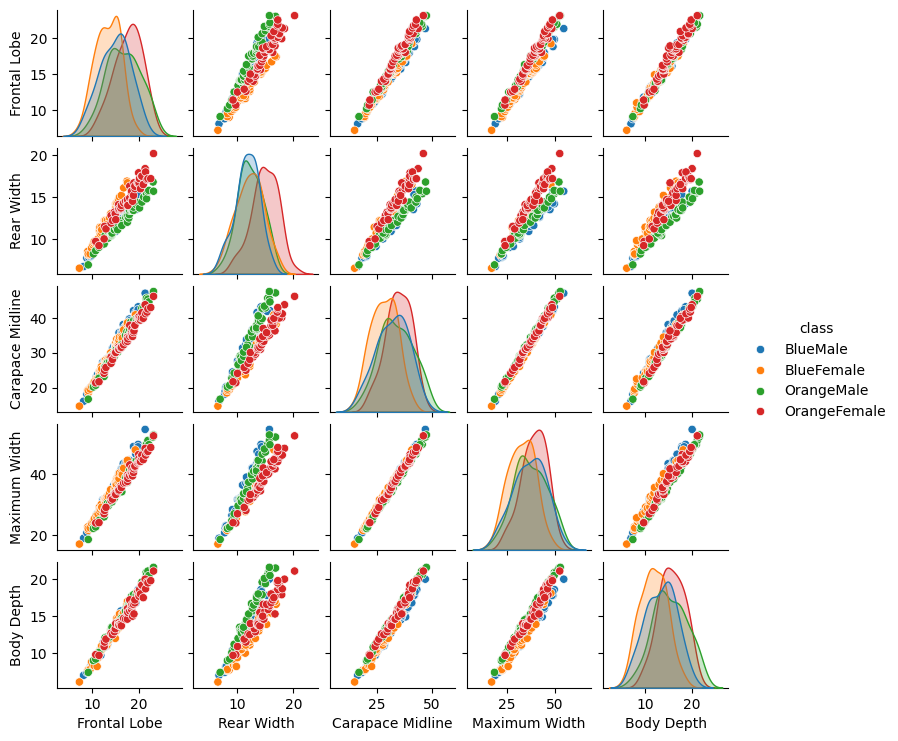

In [104]:
sns.pairplot(df, hue='class',height=1.5)

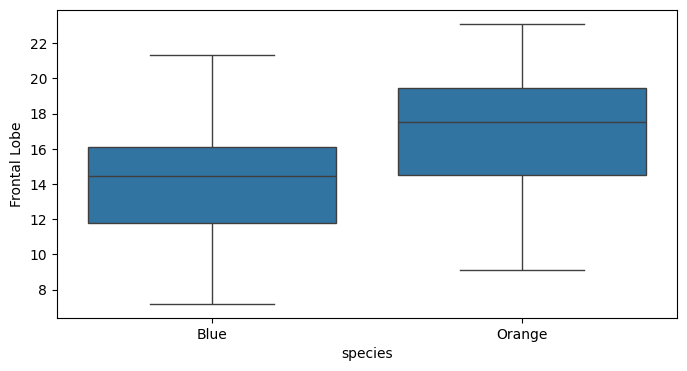

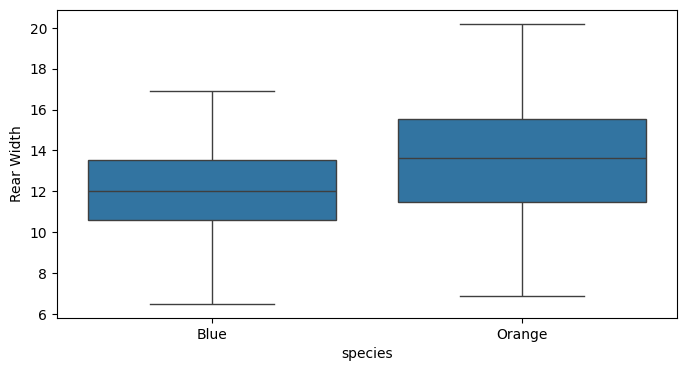

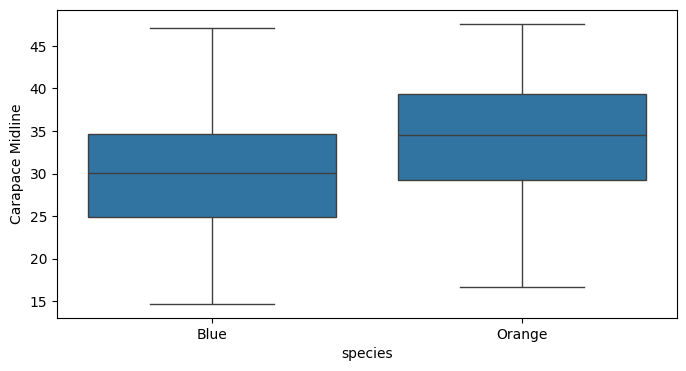

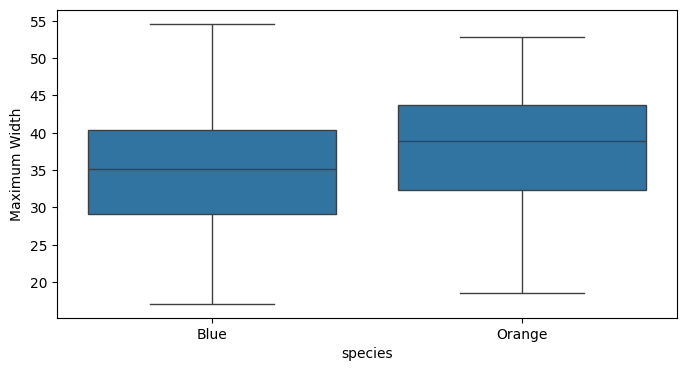

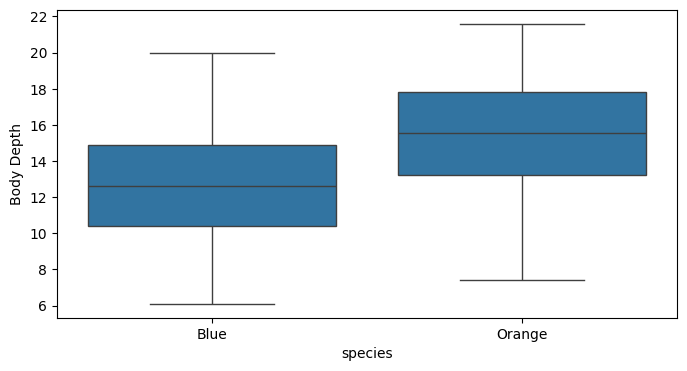

In [105]:
for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='species', y=col)

array([[<Axes: title={'center': 'Frontal Lobe'}>,
        <Axes: title={'center': 'Rear Width'}>],
       [<Axes: title={'center': 'Carapace Midline'}>,
        <Axes: title={'center': 'Maximum Width'}>],
       [<Axes: title={'center': 'Body Depth'}>, <Axes: >]], dtype=object)

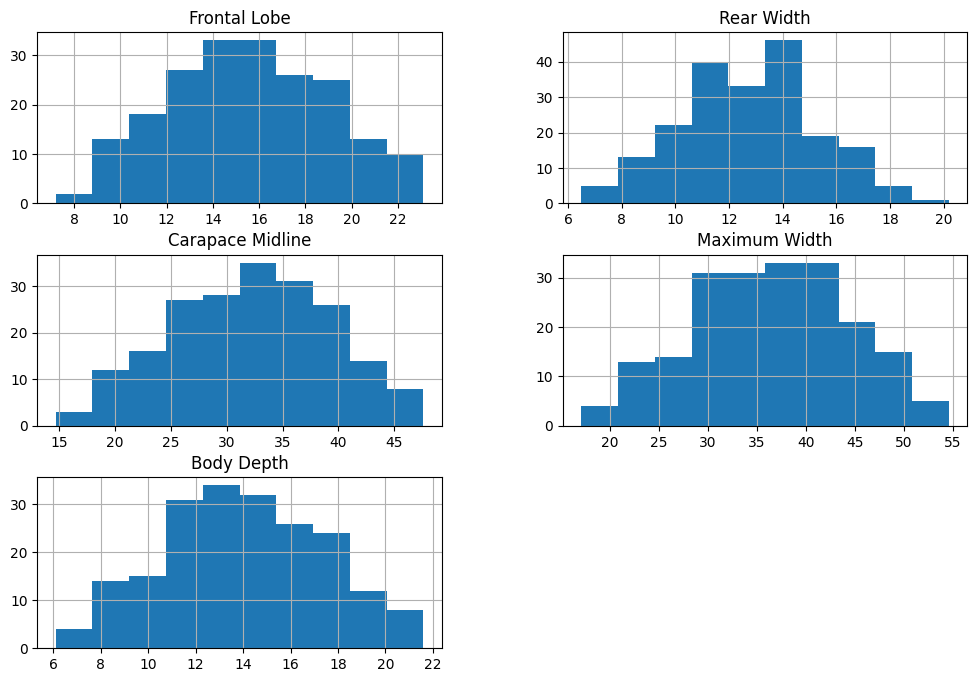

In [106]:
df.hist(figsize=(12,8))

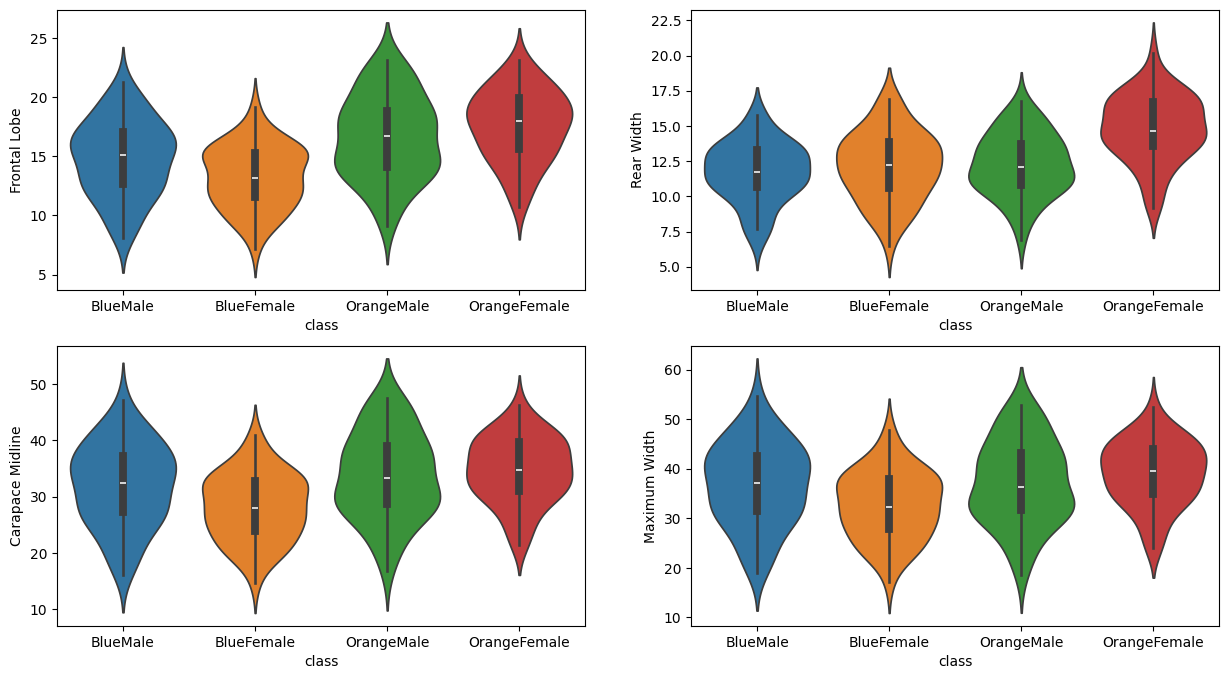

In [107]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
sns.violinplot(x='class', y='Frontal Lobe',data=df,hue="class")
plt.subplot(2,2,2)
sns.violinplot(x='class', y='Rear Width', data=df,hue="class")
plt.subplot(2,2,3)
sns.violinplot(x='class', y='Carapace Midline', data=df,hue="class")
plt.subplot(2,2,4)
sns.violinplot(x='class', y='Maximum Width', data=df,hue="class");

In [108]:
corr = df.corr(numeric_only=True)
corr

,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth
0,,,,,
Frontal Lobe,1.000000,0.906988,0.978842,0.964956,0.987627
Rear Width,0.906988,1.000000,0.892743,0.900402,0.889205
Carapace Midline,0.978842,0.892743,1.000000,0.995023,0.983204
Maximum Width,0.964956,0.900402,0.995023,1.000000,0.967812
Body Depth,0.987627,0.889205,0.983204,0.967812,1.000000


<Axes: xlabel='0', ylabel='0'>

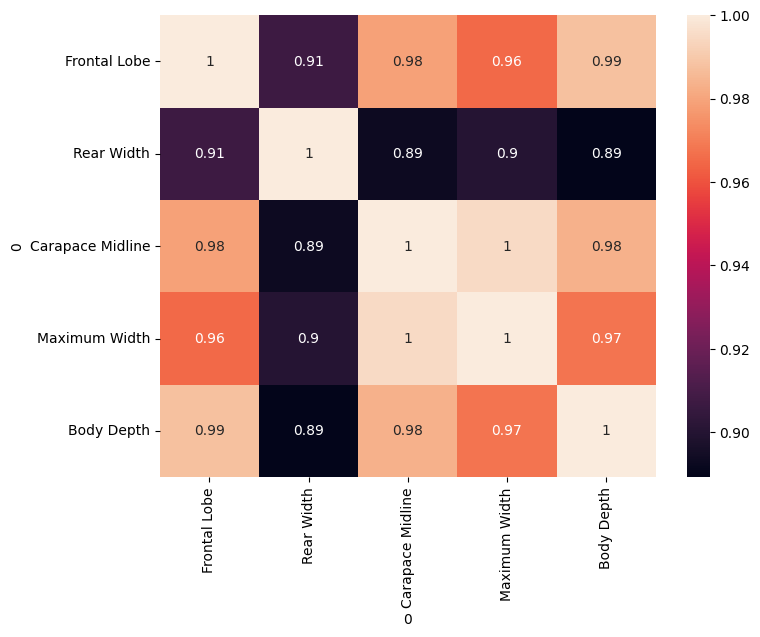

In [109]:
plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot = True)

In [110]:
df =  pd.get_dummies(df, columns=['sex'],dtype=int, drop_first=True)
df

,species,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,sex_Male
0,Blue,8.1,6.7,16.1,19.0,7.0,BlueMale,1
1,Blue,8.8,7.7,18.1,20.8,7.4,BlueMale,1
2,Blue,9.2,7.8,19.0,22.4,7.7,BlueMale,1
3,Blue,9.6,7.9,20.1,23.1,8.2,BlueMale,1
4,Blue,9.8,8.0,20.3,23.0,8.2,BlueMale,1
...,...,...,...,...,...,...,...,...
195,Orange,21.4,18.0,41.2,46.2,18.7,OrangeFemale,0
196,Orange,21.7,17.1,41.7,47.2,19.6,OrangeFemale,0
197,Orange,21.9,17.2,42.6,47.4,19.5,OrangeFemale,0
198,Orange,22.5,17.2,43.0,48.7,19.8,OrangeFemale,0


In [93]:
df.columns

Index(['Frontal Lobe', 'Rear Width', 'Carapace Midline', 'Maximum Width',
       'Body Depth', 'class', 'species_Orange', 'sex_Male'],
      dtype='object')

In [111]:
df = df[['Frontal Lobe', 'Rear Width', 'Carapace Midline', 'Maximum Width',
       'Body Depth', 'class', 'sex_Male', 'species']]
df

,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,sex_Male,species
0,8.1,6.7,16.1,19.0,7.0,BlueMale,1,Blue
1,8.8,7.7,18.1,20.8,7.4,BlueMale,1,Blue
2,9.2,7.8,19.0,22.4,7.7,BlueMale,1,Blue
3,9.6,7.9,20.1,23.1,8.2,BlueMale,1,Blue
4,9.8,8.0,20.3,23.0,8.2,BlueMale,1,Blue
...,...,...,...,...,...,...,...,...
195,21.4,18.0,41.2,46.2,18.7,OrangeFemale,0,Orange
196,21.7,17.1,41.7,47.2,19.6,OrangeFemale,0,Orange
197,21.9,17.2,42.6,47.4,19.5,OrangeFemale,0,Orange
198,22.5,17.2,43.0,48.7,19.8,OrangeFemale,0,Orange


In [118]:
df = df.drop(columns=['class'])
df

KeyError: "['class'] not found in axis"

In [119]:
target = 'species'

X = df.drop(columns=[target])
y = df[target]

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 163,
                                                    )

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [122]:
classifiers = [DecisionTreeClassifier(max_depth=4),
               RandomForestClassifier(n_estimators=200,random_state=667),
               GradientBoostingClassifier(),
               GradientBoostingClassifier(n_estimators=50),
               LogisticRegression(max_iter=1000),
               GaussianNB(),
               KNeighborsClassifier(n_neighbors=2),
               SVC(probability=True,kernel='rbf'),
               # XGBClassifier()
               ]

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.3,
                                                    random_state=667,
                                                    )
for cls in classifiers:
    cls.fit(X_train, y_train)
    cls.predict(X_test)

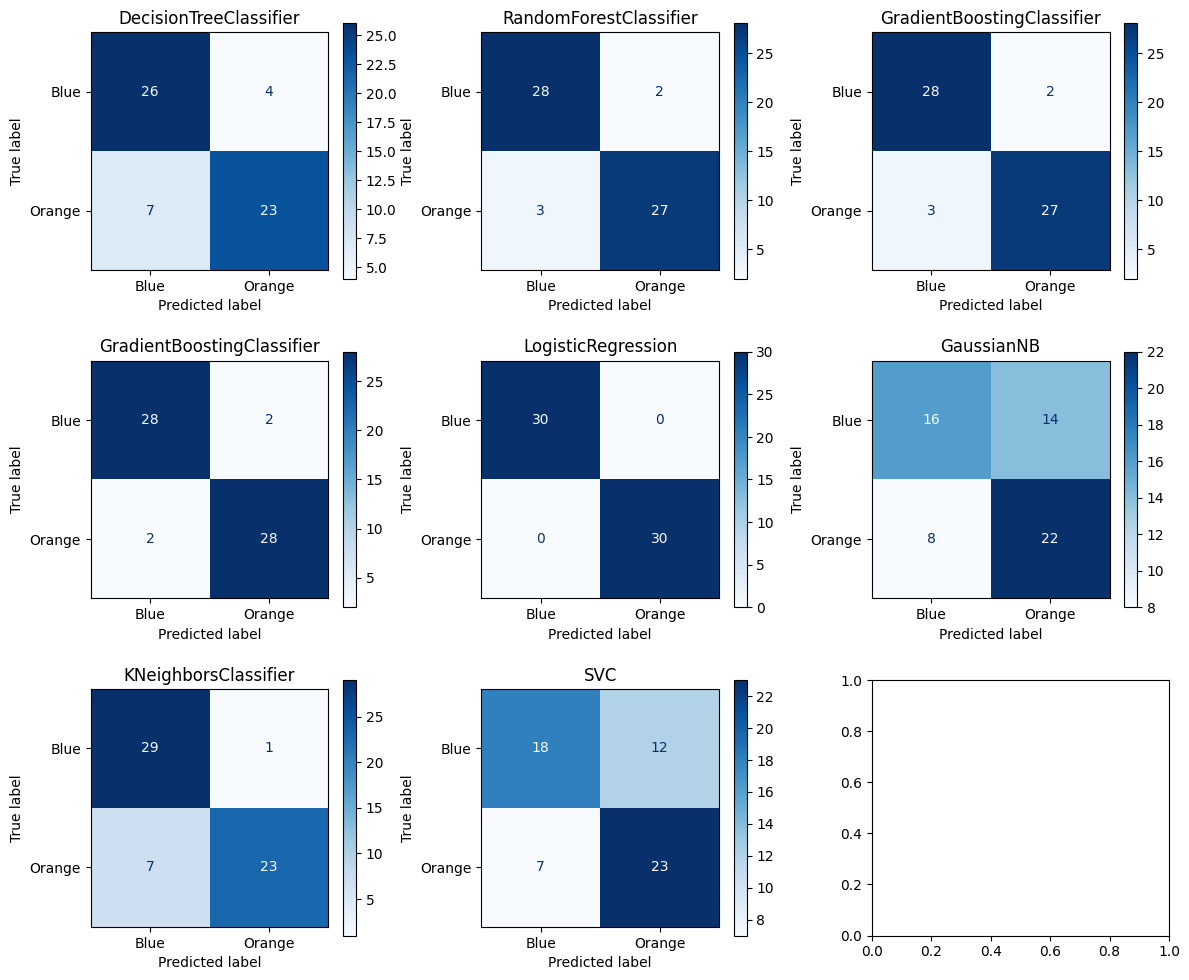

In [127]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))

labels = ['Blue','Orange']
for cls, ax in zip(classifiers, axes.flatten()):
    ConfusionMatrixDisplay.from_estimator(cls,
                                            X_test,
                                            y_test,
                                            ax=ax,
                                            cmap='Blues',
                                            display_labels=labels,
                                            )
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()

In [ ]:
# i migliori sono: RandomForestClassifier

In [128]:
from sklearn.metrics import classification_report

for cls, ax in zip(classifiers, axes.flatten()):
    print(cls)
    print(classification_report(y_test,cls.predict(X_test),target_names=labels))

DecisionTreeClassifier(max_depth=4)
              precision    recall  f1-score   support

        Blue       0.79      0.87      0.83        30
      Orange       0.85      0.77      0.81        30

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60

RandomForestClassifier(n_estimators=200, random_state=667)
              precision    recall  f1-score   support

        Blue       0.90      0.93      0.92        30
      Orange       0.93      0.90      0.92        30

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60

GradientBoostingClassifier()
              precision    recall  f1-score   support

        Blue       0.90      0.93      0.92        30
      Orange       0.93      0.90      0.92        30

    accuracy                           0.92        60
   m

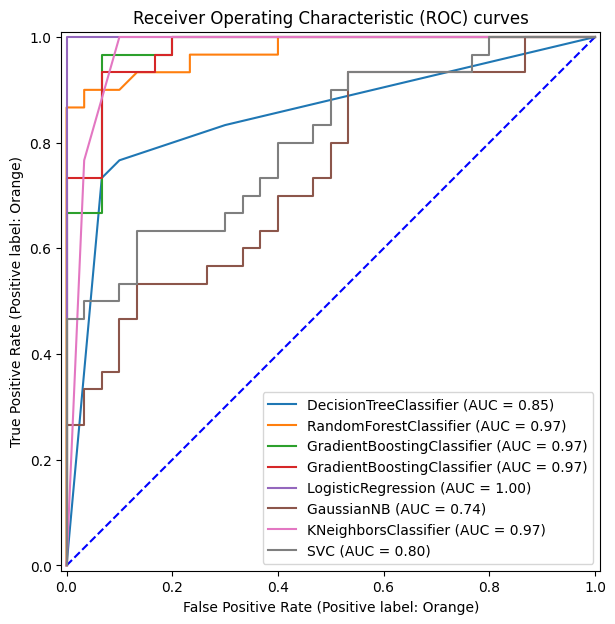

In [129]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

plt.figure(figsize=(8,7))
ax = plt.gca()
plt.plot([0,1],[0,1],'--b')

for cls in classifiers:
    model = cls.fit(X_train, y_train)
    y_score =model.predict_proba(X_test)[:, 1]
    auc_model = roc_auc_score(y_test,y_score)

    RocCurveDisplay.from_estimator(model, X_test, y_test, label=f'{cls.__class__.__name__} (AUC = {auc_model:.2f})', ax=ax)
    plt.title("Receiver Operating Characteristic (ROC) curves")
    plt.legend(loc=4)

In [131]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
                'bootstrap': [True],
                'max_depth': [80, 90, 100, 110],
                'max_features': [2, 3],
                'min_samples_leaf': [3, 4, 5],
                'min_samples_split': [8, 10, 12],
                'n_estimators': [100, 200, 300, 1000]
            }

rf = RandomForestClassifier(random_state=667)
grid_search_rf = GridSearchCV(estimator = rf,
                            param_grid = param_grid,
                            cv = 5,
                            n_jobs = -1,
                            verbose = 2
                            )

In [132]:
grid_search_rf.fit(X_train, y_train)
grid_search_rf.best_params_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [134]:
from sklearn.metrics import accuracy_score

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    print('Model Performance')
    print(f'Accuracy score: {acc:0.2f} %')
    return  round(acc,2)

best_grid = grid_search_rf.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)
grid_accuracy

Model Performance
Accuracy score: 0.88 %


0.88

Text(0.5, 1.0, 'Visualizing Important Features')

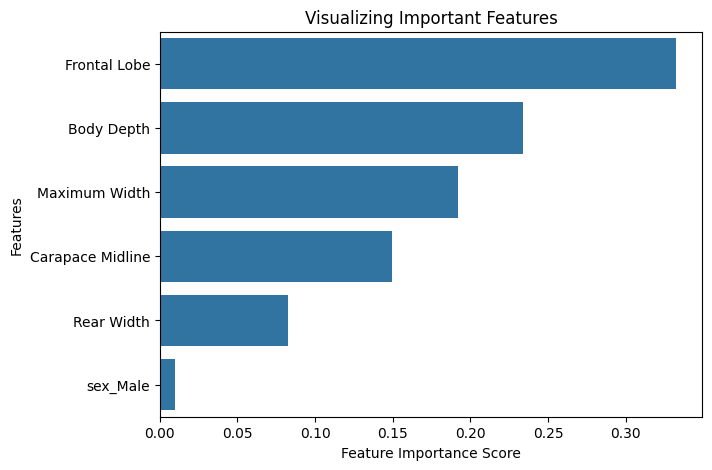

In [135]:
X = df.iloc[:,:-1]
feature_imp = pd.Series(best_grid.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(7,5))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

Parte 2

In [136]:
numerical_features = [x for x, dtype in zip(X.columns, X.dtypes) if dtype.kind in ['i','f'] ]
categorical_features = [x for x, dtype in zip(X.columns, X.dtypes) if dtype.kind not in ['i','f']]

print('Numerical : ' + str(numerical_features))
print('Categorical : ' + str(categorical_features))

Numerical : ['Frontal Lobe', 'Rear Width', 'Carapace Midline', 'Maximum Width', 'Body Depth', 'sex_Male']
Categorical : []


In [137]:
# non è necessario farlo, ma lo metto comunque per essere più comoda dopo

Preprocessor = make_column_transformer(
                                        (make_pipeline(
                                        SimpleImputer(strategy = 'median'),
                                        KBinsDiscretizer(n_bins=3)), numerical_features),

                                        (make_pipeline(
                                        #FunctionTransformer(lambda x: np.where(x == 'n.d.', np.nan, x)),
                                        SimpleImputer(strategy = 'constant', fill_value = 'missing'),
                                        OneHotEncoder(categories = 'auto', handle_unknown = 'ignore',drop='first')), categorical_features)
                                        )

In [138]:
scaler = StandardScaler()

classifier = RandomForestClassifier(bootstrap=True,
                                    max_depth=80,
                                    max_features=2,
                                    min_samples_leaf=3,
                                    min_samples_split=8,
                                    n_estimators=100
                                    )

In [139]:
model_pipe = Pipeline([
                       ('Preprocessing features', Preprocessor),
                       ('Scaling and standadize data', scaler),
                       ('Classifier', classifier)
                      ])
model_pipe

Pipeline(steps=[('Preprocessing features',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('kbinsdiscretizer',
                                                                   KBinsDiscretizer(n_bins=3))]),
                                                  ['Frontal Lobe', 'Rear Width',
                                                   'Carapace Midline',
                                                   'Maximum Width',
                                                   'Body Depth', 'sex_Male']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  [])])),
                ('Scaling and standadize data', StandardScaler()),
                ('Classifier',
                 RandomForestClassifier(max_depth=80, max_features=2,
                                        min_samples_leaf=3,
                                        min_samples_split=8))])

In [140]:
cross_val_scores = cross_val_score(model_pipe, X, y, cv=5)
print(cross_val_scores)

mean_score = np.mean(cross_val_scores)
std_score = np.std(cross_val_scores)

print(f"Mean cross-validation score:{mean_score:.2f}")
print(f"Standard deviation of cross-validation scores:{std_score:.2f}")

[0.525 0.475 0.5   0.45  0.5  ]
Mean cross-validation score:0.49
Standard deviation of cross-validation scores:0.03


In [141]:
model_pipe.fit(X, y)

Pipeline(steps=[('Preprocessing features',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('kbinsdiscretizer',
                                                                   KBinsDiscretizer(n_bins=3))]),
                                                  ['Frontal Lobe', 'Rear Width',
                                                   'Carapace Midline',
                                                   'Maximum Width',
                                                   'Body Depth', 'sex_Male']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  [])])),
                ('Scaling and standadize data', StandardScaler()),
                ('Classifier',
                 RandomForestClassifier(max_depth=80, max_features=2,
                                        min_samples_leaf=3,
                                        min_samples_split=8))])

In [142]:
y_pred_tot = model_pipe.predict(X)

In [143]:
from sklearn.metrics import classification_report

classification_report(y,y_pred_tot )

classification_report_result = classification_report(y, y_pred_tot)
print(classification_report_result)

              precision    recall  f1-score   support

        Blue       0.77      0.74      0.76       100
      Orange       0.75      0.78      0.76       100

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



In [145]:
import joblib

joblib.dump(model_pipe,'crabs_pipe.pkl')

['crabs_pipe.pkl']

In [146]:
import joblib

model_pipe = joblib.load('crabs_pipe.pkl')
print('Model loaded successfully')

Model loaded successfully


In [147]:
model_pipe

Pipeline(steps=[('Preprocessing features',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('kbinsdiscretizer',
                                                                   KBinsDiscretizer(n_bins=3))]),
                                                  ['Frontal Lobe', 'Rear Width',
                                                   'Carapace Midline',
                                                   'Maximum Width',
                                                   'Body Depth', 'sex_Male']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  [])])),
                ('Scaling and standadize data', StandardScaler()),
                ('Classifier',
                 RandomForestClassifier(max_depth=80, max_features=2,
                                        min_samples_leaf=3,
                                        min_samples_split=8))])

In [148]:
from sklearn.decomposition import PCA

pca= PCA()
model_pipe_pca = Pipeline([
                        ('Preprocessing features', Preprocessor),
                        ('Scaling and standadize data', scaler),
                        # sempre prima del classifier e dopo lo scaling
                        ('PCA',pca),
                        ('Classifier', classifier)
                        ])

model_pipe_pca

Pipeline(steps=[('Preprocessing features',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('kbinsdiscretizer',
                                                                   KBinsDiscretizer(n_bins=3))]),
                                                  ['Frontal Lobe', 'Rear Width',
                                                   'Carapace Midline',
                                                   'Maximum Width',
                                                   'Body Depth', 'sex_Male']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  [])])),
                ('Scaling and standadize data', StandardScaler()),
                ('PCA', PCA()),
                ('Classifier',
                 RandomForestClassifier(max_depth=80, max_features=2,
                                        min_samples_leaf=3,
                                        min_samples_split=8))])

In [149]:
cross_val_scorespca = cross_val_score(model_pipe_pca, X, y, cv=5)
print(cross_val_scorespca)
# Calcola la media e la deviazione standard dei punteggi
mean_score = np.mean(cross_val_scorespca)
std_score = np.std(cross_val_scorespca)

print(f"Mean cross-validation score:{mean_score:.2f}")
print(f"Standard deviation of cross-validation scores:{std_score:.2f}")

[0.525 0.475 0.55  0.45  0.6  ]
Mean cross-validation score:0.52
Standard deviation of cross-validation scores:0.05


In [150]:
model_pipe_pca.fit(X,y)

Pipeline(steps=[('Preprocessing features',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('kbinsdiscretizer',
                                                                   KBinsDiscretizer(n_bins=3))]),
                                                  ['Frontal Lobe', 'Rear Width',
                                                   'Carapace Midline',
                                                   'Maximum Width',
                                                   'Body Depth', 'sex_Male']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  [])])),
                ('Scaling and standadize data', StandardScaler()),
                ('PCA', PCA()),
                ('Classifier',
                 RandomForestClassifier(max_depth=80, max_features=2,
                                        min_samples_leaf=3,
                                        min_samples_split=8))])

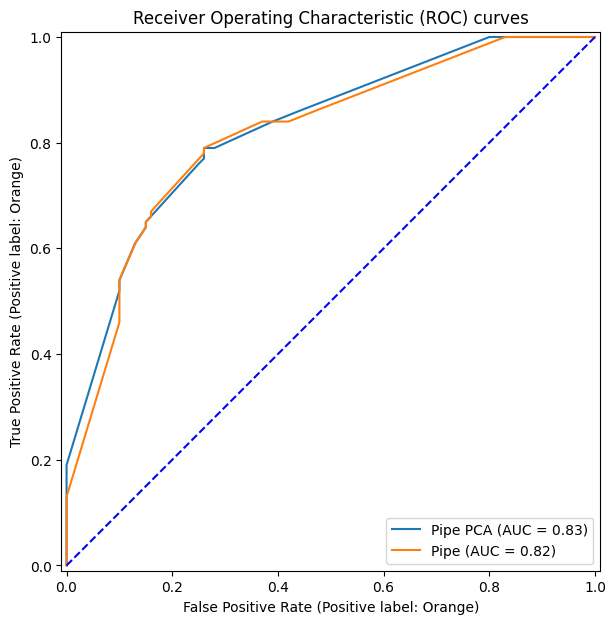

In [151]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score

# Calculate AUC for each model
auc_pipe_pca = roc_auc_score(y, model_pipe_pca.predict_proba(X)[:, 1])
auc_pipe = roc_auc_score(y, model_pipe.predict_proba(X)[:, 1])

plt.figure(figsize=(8,7))
ax = plt.gca()

# Plot ROC curves and add AUC to the legend
RocCurveDisplay.from_estimator(model_pipe_pca, X, y, label=f'Pipe PCA (AUC = {auc_pipe_pca:.2f})', ax=ax)
RocCurveDisplay.from_estimator(model_pipe, X, y, label=f'Pipe (AUC = {auc_pipe:.2f})', ax=ax)
plt.plot([0,1],[0,1],'--b')

plt.title("Receiver Operating Characteristic (ROC) curves")
plt.legend(loc=4);